<a href="https://colab.research.google.com/github/imaansh/Loan-Status-Prediction/blob/main/Loan_Prediction_Imaan_29_01_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Prediction

Group Members:

Sushreeta Pal - 478579

Imaan Shahid - 483966

Anuja Limaye - 482706

Neha Barhanpurkar - 481284

## Description of the Machine Learning Task and Motivation

1. **Which type of machine learning task are you performing?**

   This is a **supervised learning problem**, specifically a **binary classification task**. The goal is to predict whether a loan application will be **approved (Yes)** or **rejected (No)** based on applicant and property features such as income, employment status, credit history, and property area.

2. **What is the practical relevance of this project?**

    The practical relevance of this project is that it enables faster, automated decision-making without relying on manual processes. It helps reduce the risk of granting loans to individuals who may not be able to repay them, while also making the overall process quicker and more efficient for customers. In addition, it allows banks to base their decisions on data-driven insights rather than intuition or guesswork.


3. **What dataset are you using (name, source, short description)**

   **Dataset Name:** Loan Prediction Dataset
   **Source:** [Analytics Vidhya Practice Dataset](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii)  
   **Description:**  
     The dataset contains loan applications with information about the applicant(s) and the property. It includes both **categorical** and **numerical** features:

     | Feature              | Type        | Description |
     |---------------------|------------|-------------|
     | Loan ID             | Categorical| Unique ID
     | Gender              | Categorical | Applicant’s gender |
     | Married             | Categorical | Marital status |
     | Dependents          | Categorical/Numerical | Number of dependents (0,1,2,3+) |
     | Education           | Categorical | Graduate/Not Graduate |
     | Self_Employed       | Categorical | Yes/No |
     | ApplicantIncome     | Numerical   | Monthly income of applicant |
     | CoapplicantIncome   | Numerical   | Monthly income of co-applicant |
     | LoanAmount          | Numerical   | Loan amount requested |
     | Loan_Amount_Term    | Numerical   | Term of loan in months |
     | Credit_History      | Categorical | 1 = meets guidelines, 0 = otherwise |
     | Property_Area       | Categorical | Urban, Semiurban, Rural |
     | Loan_Status         | Categorical (Target) | Y = Approved, N = Not approved |

**This section loads all required libraries for the project.**

It includes tools for:

Data manipulation and numerical computation(pandas, numpy), Mathematical operations (math), data preprocessing such as handling missing values, encoding categorical variables, and feature scaling.

It also includes libraries for dataset splitting and model validation along with Machine learning algorithms including Logistic Regression, Naive Bayes, and Random Forest. We have libraries for hyperparameter tuning, feature selection, model performance evaluation using classification metrics, ROC-AUC, accuracy, and ROC curve analysis and data visualization using matplotlib and seaborn

In [ ]:
# Import the Required Libraries
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

## Data Analysis

The steps we followed for data analysis were that we first load the dataset and start by exploring the dataset. We do that by observing the first few rows of the dataset to catch any data cleaning required. Then, we observe the column data types and names to figure out any inconsistencies with the data. Then, we plot a heatmap for to observe the missing values in the dataset to either impute them or drop the columns.


**Reading the Loan Data Set**

In [ ]:
# Reading the Loan Data Set
Path = "data.csv"
df = pd.read_csv(Path)

**Explored a few data points from the dataset**

In [ ]:
# Displaying few data from the data set loaded
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


There are null values, which should be handled. The Loan ID is just a ID generated for a customer so it should be removed since it has no effect on loan. Moreover, the Dependents columns has a 3+ value which should be fixed.

**Explored dataset dimensions and column types.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Since dependents have numbers, we will convert it to float. The Loan status should be marked as 1 or 0 for the model training

**Generate a heatmap to display the distribution of missing values across the dataset.**

<Axes: >

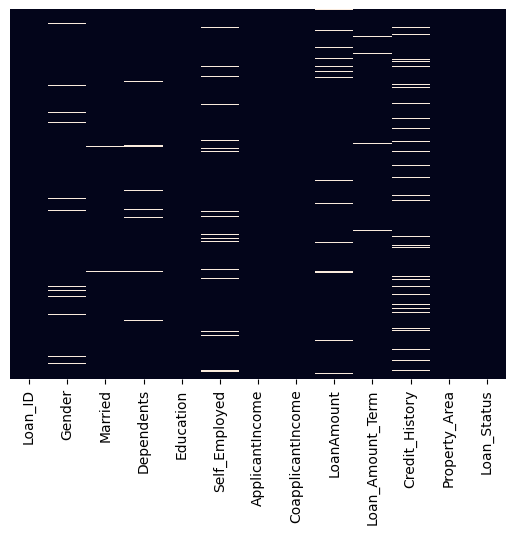

In [ ]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

The dataset has null values in many columns and since the dataset size is small we impute the categorical values with mode and numerical values with median of the non-null values.

## Exploratory Data Analysis (EDA)

For the EDA, we start with visualising the distributions of the numerical features to check if any numerical variable is skewed.

Next, we visualise the categorical features like Gender, Married, Education, Credit History etc with respect to the loan label. This shows us if any categorical values have an effect on the loan being granted.

In the end, we plot a correlation matrix to visualise how much each feature is related to the loan status. For this plot, we also map loan label as 1 (loan granted) and 0 (loan not granted).


**Visualizing Distribution of Numerical Features**

 This section identifies all numerical variables in the dataset and visualizes their distributions using histograms.
 A dynamic subplot grid is created to efficiently display multiple feature distributions in a single figure.
 Each histogram includes a Kernel Density Estimation (KDE) curve to better understand the underlying data patterns.

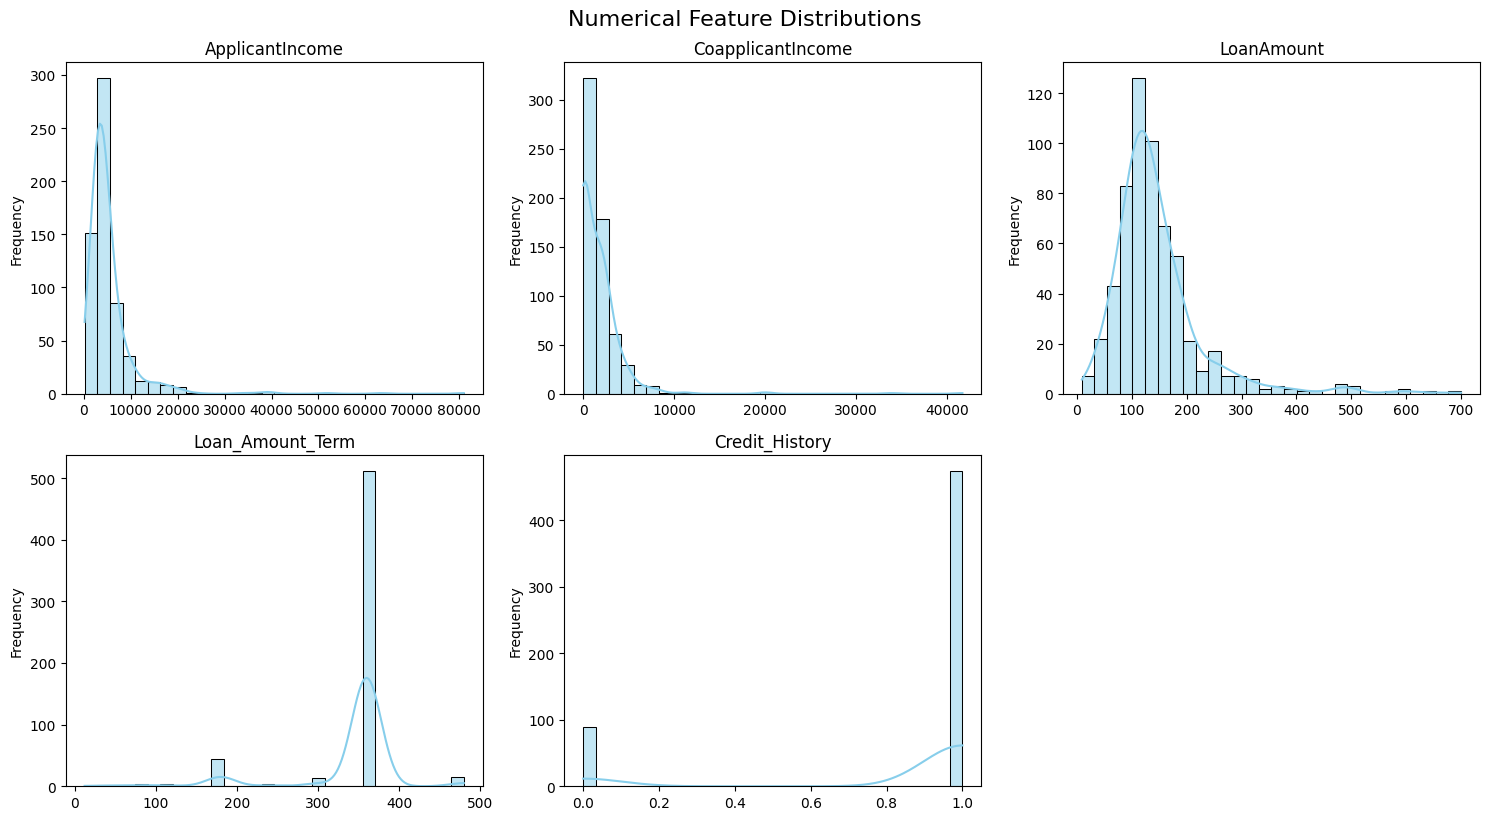

In [ ]:
# "df" is the data frame for storing loan data
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine grid size
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create figure
plt.figure(figsize=(n_cols*5, n_rows*4))

# Loop through columns and plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Numerical Feature Distributions', fontsize=16, y=1.02)
plt.show()


The distribution of applicant income is right-skewed, which means most applicants earn relatively lower incomes while a small number earn very high amounts that appear as outliers on the right.

The co-applicant income distribution shows a similar right-skewed pattern and also contains many outliers, indicating that a few co-applicants report unusually high incomes compared to the majority.

The loan amount distribution appears roughly normal overall, although it still includes several outliers representing unusually large loans. Most applicants select a loan term of around 360 months (30 years), while only a small proportion chooses shorter or less typical loan durations.

Credit history is represented as a binary variable where 1 indicates a good credit history and 0 indicates poor or missing credit history, and most applicants fall into the category of having a good credit history.

**Visualizing how Loan_Status varies with key categorical features:**

Gender, Married, Education, Self_Employed, Credit_History, and Property_Area using percentage bar plots

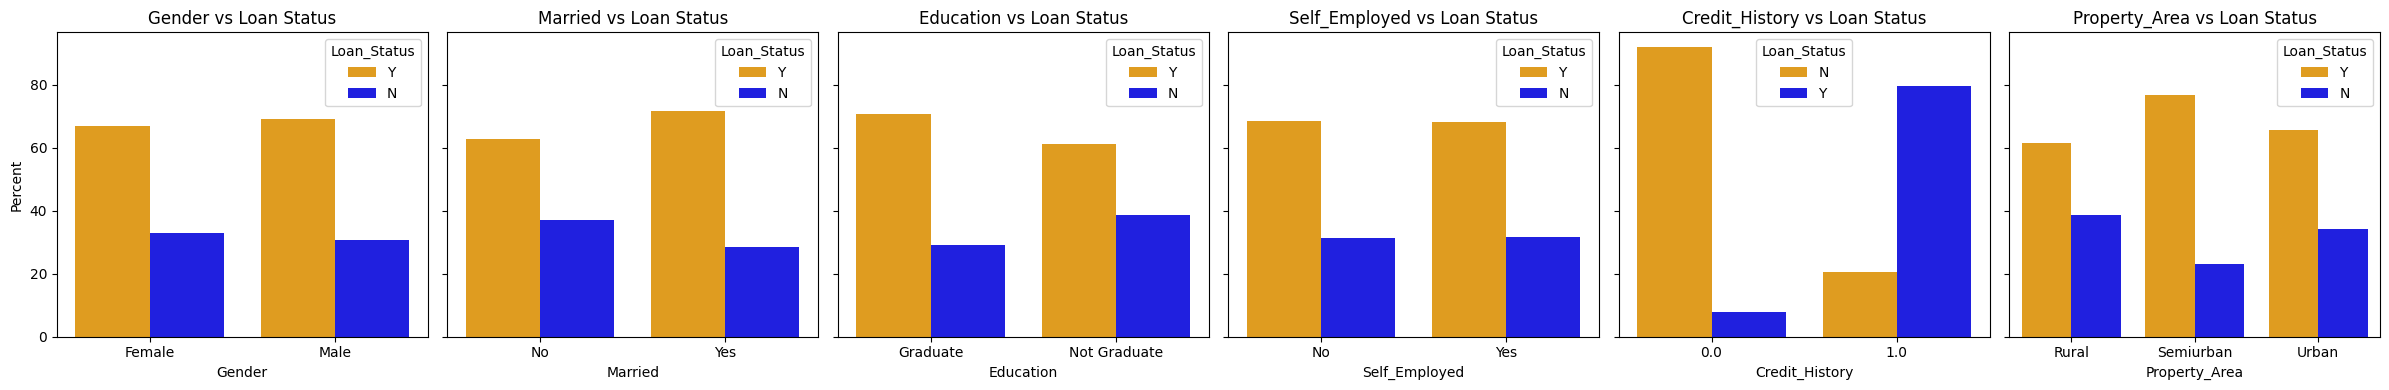

In [ ]:
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
fig, axes = plt.subplots(1, len(features), figsize=(4*len(features), 4), sharey=True)
for ax, x in zip(axes, features):

    plot_df = (
        df.groupby(x)['Loan_Status']
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
    )

    sns.barplot(
        data=plot_df,
        x=x,
        y='percent',
        hue='Loan_Status',
        ax=ax,
        palette=['orange', 'blue']
    )

    ax.set_title(f"{x} vs Loan Status")
    ax.set_xlabel(x)
    ax.set_ylabel("Percent")

plt.tight_layout()
plt.show()


Credit history is by far the most significant feature in this dataset. Roughly 80% of applicants with a good credit history received a loan, whereas almost 90% of applicants with no credit history were rejected. This suggests that, in the machine learning model, this feature will likely have the highest feature importance.

Property area also plays a noticeable role in approval rates. Applicants living in semiurban areas have the highest approval rate, close to 75–80%, while those in rural areas have the lowest approval rate among the three categories. Urban applicants fall in the middle at around 65%. This indicates that living in a semiurban area appears to be a positive indicator for approval in this dataset.

Education and employment show mixed effects. Graduates have a higher approval rate of approximately 70% compared to non-graduates at about 60%. In contrast, there is very little difference in approval rates between self-employed applicants and those who are not, as both groups remain around the 68–70% range. This suggests that education matters more than the specific type of employment for this particular lender.

Demographic factors such as marital status and gender also show some influence. Married applicants have a noticeably higher approval rate of roughly 72% compared to about 63% for single applicants. Gender shows only a small difference, with male applicants having an approval rate of around 69% compared to about 66% for female applicants. This indicates that being married is a stronger positive predictor for loan approval than gender in this dataset.

In [ ]:
# Mapping loan status to 1 and 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

**Correlation Heatmap**

Heatmap to check correlation between numerical variables.

High correlation with Loan Status or between predictors can guide feature selection.

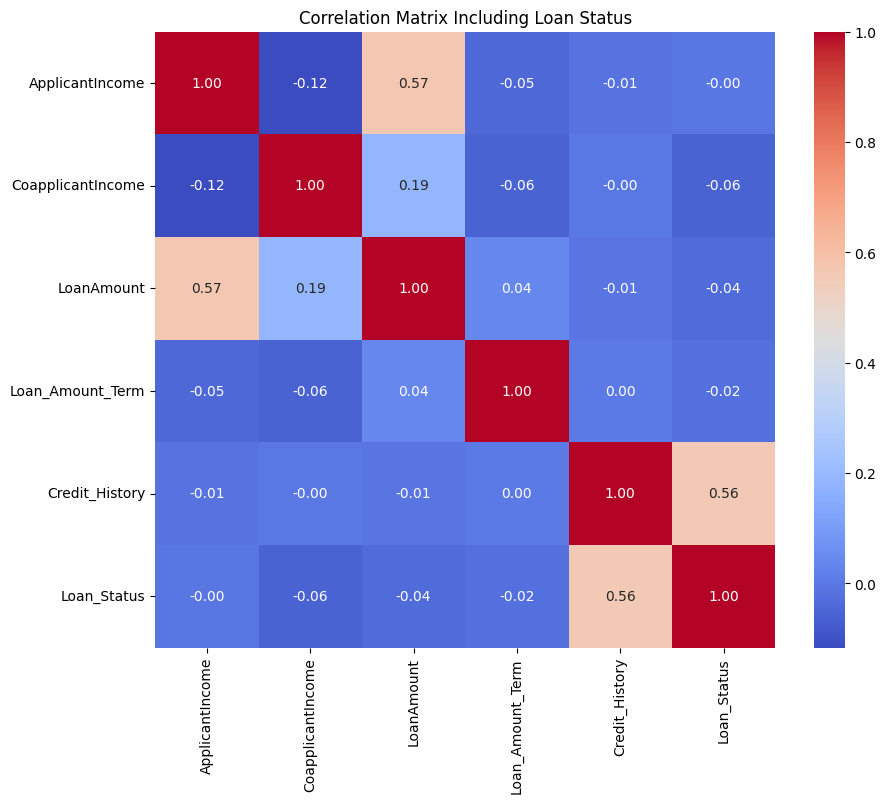

In [ ]:
# Compute and visualize the correlation matrix for numerical features including Loan_Status
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Loan Status")
plt.show()

**We see that the most correlated variables are:**

ApplicantIncome - LoanAmount and

Credit_History - Loan_Status.

LoanAmount is also correlated with CoapplicantIncome.

## Data Cleaning

An initial inspection of the dataset reveals the presence of both numerical and categorical features describing applicant demographics, financial characteristics, and credit behaviour. Several variables contain missing values, which must be addressed through appropriate imputation to ensure stable model training and avoid bias introduced by incomplete observations.

Exploratory data analysis indicates that certain variables, particularly credit history, exhibit a strong association with loan approval outcomes. This suggests that the dataset contains dominant predictive signals, which may allow even relatively simple models to perform effectively. Some categorical variables also display noticeable differences in approval rates across groups, motivating the use of encoding techniques to convert these features into numerical form.

These observations guide the preprocessing pipeline, which includes handling missing values, encoding categorical variables, and applying feature scaling where required by specific models.

In [ ]:
# Drop the Loan_ID column as it does not contribute to loan prediction
df.drop(columns=['Loan_ID'], inplace=True)

# Convert 'Dependents' column to numeric by replacing '3+' with 4
df['Dependents'] = df['Dependents'].replace('3+', 4)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [ ]:
# Identify numerical and categorical columns in the dataset
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols =df.select_dtypes(include=['object']).columns

# Handle missing values using imputation for numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

## Feature Engineering

Here, we add some feautres to our dataset for more features that might have an effect on loan status.

We combine the Applicant Income and Coapplicant income to create a total income column. The reason for this is that the individual columns don't have much relevance (as seen in the correlation matrix). Hence, we create a total income column to show the total income of the application which would be more suitable. We also take the log of this total income since the two individual features were skewed.

We also create a loan to income ratio. A higher ratio would mean that loan required is less than the total income, which could be a problem since the applicant might not be able to return the granted loan because of low income.


We use one-hot encoding to encode the categorical columns. The only exception is Property Area since it has "Rural", "Semi-Urban" and "Urban" so, we have ordinally encoded it (assuming an ordinal relationship between them).

The data is split into training and testing datasets and scaling is performed. This is the pre-preparation of the data before the model is trained on it.

In [ ]:
# Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log1p(df['TotalIncome']) #reduces skew

# Loan to Income ratio
df['Loan_to_Income'] = df['LoanAmount'] / df['TotalIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome','TotalIncome'], inplace=True)


In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome_log', 'Loan_to_Income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# List of categorical columns excluding Property_Area
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

# Define the order
area_order = ['Rural', 'Semiurban', 'Urban']
ordinal_encoder = OrdinalEncoder(categories=[area_order])

# Apply to Property_Area
df['Property_Area_Ord'] = ordinal_encoder.fit_transform(df[['Property_Area']])

# One-hot encoding for other categorical columns (excluding Loan_Status)
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Drop original categorical columns (but NOT Loan_Status) and concatenate dummies
df = df.drop(columns=cat_cols)
df = df.drop(columns='Property_Area')
df = pd.concat([df, df_dummies], axis=1)

print(df.columns)

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'Loan_to_Income', 'Property_Area_Ord', 'Dependents',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes'],
      dtype='object')


In [ ]:
# The dataset is divided into input features (X) and the target variable (y).
# The features in X are used to predict whether a loan is approved or not, which is represented by Loan_Status in y.
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
# Initialize the StandardScaler object
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This computes the mean and std from X_train and scales the training features accordingly
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler fitted on the training data
# It's important to use the same scaler so the test data is scaled consistently
X_test_scaled = scaler.transform(X_test)


## Model Training
Now, let's train three different models and compare their performance on the test data. We are using the following models for training:


1.   Naive Bayes
2.   Logistic Regression
3.   Random Forest


Following are the steps that we take for training the models:

### Model Initialisation, feature selection and fitting
First we initialise the model. Then, we use forward feature selection (using stratified K-fold cross-validation) to select the features which are the most important. Next, we fit the model on the selected features.

### Hyperparameter Tuning
Now, for tuning hyperparameters we initialise a list of hyperparameters. Then, using the Grid Search we find the best performing hyperparameters using 5-fold cross validation.

### Model Evaluation
In the next step, we evaluate the performance of the models for different thershold values (0.3 and 0.8) and print the classification report. Then we plot the ROC curve for the models to view how model separates the two classes across all classification thresholds.


### Model Comparison
In the end, we print the classification report for each model to compare the three models and choose the one with the highest overall performance


# Naive Bayes

Naive Bayes is chosen as a baseline classifier because it is computationally efficient and relies on probabilistic reasoning. Although it assumes independence between features, which rarely holds in practice, it often performs surprisingly well and provides a useful reference point for evaluating more complex models.

After training, the model's performance metrics are evaluated to determine how well the independence assumption holds for this dataset.


In [ ]:
# Initialize base Naive Bayes model
nb_model = GaussianNB()

# Sequential Feature Selector (forward selection)
sfs_nb = SequentialFeatureSelector(
    nb_model,
    n_features_to_select='auto',
    direction='forward',
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

# Pipeline: Feature Selection Gaussian Naive Bayes
pipe_nb = Pipeline([
    ('feature_selector', sfs_nb),
    ('classifier', nb_model)
])

# Hyperparameter grid for var_smoothing
param_grid_nb = {
    'classifier__var_smoothing': np.logspace(-12, -6, 20)
}

# GridSearchCV with pipeline
grid_nb = GridSearchCV(
    estimator=pipe_nb,
    param_grid=param_grid_nb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit pipeline on training data (no scaling needed)
grid_nb.fit(X_train, y_train)

# Best hyperparameter
print("Best var_smoothing:", grid_nb.best_params_)

# Predict probabilities on test set
nb_probs = grid_nb.predict_proba(X_test)[:, 1]

# Get selected features
selected_features_mask_nb = grid_nb.best_estimator_.named_steps['feature_selector'].get_support()
selected_features_nb = X_train.columns[selected_features_mask_nb]
print("Selected Features:", selected_features_nb)

Best var_smoothing: {'classifier__var_smoothing': np.float64(4.832930238571752e-07)}
Selected Features: Index(['Credit_History', 'TotalIncome_log', 'Property_Area_Ord', 'Married_Yes',
       'Education_Not Graduate'],
      dtype='object')


Interpretation of Results
The model selected the following 5 important features:
* Credit_History - Applicants with good credit history are more likely to get approval.
* TotalIncome_log - Higher income improves repayment capacity.
* Property_Area_Ord - Property location influences loan approval chances.
* Married_Yes - Married applicants may be financially more stable.
* Education_Not Graduate - Education level also impacts approval risk.

The best hyperparameter was var_smoothing = 1e-12

The classes learned by the model were the following:
* [0, 1] represents the two target classes:
* 0 → Loan Not Approved
* 1 → Loan Approved
* Predicted probabilities correspond to Class 1 (approval chance).

In [ ]:
# Compute the ROC curve metrics using the true labels and predicted probabilities
nbc_fpr, nbc_tpr, nbc_thresholds = roc_curve(y_test, nb_probs)

In [ ]:
def evaluate_threshold(threshold,test_probs):
    print(f"\n=== Threshold = {threshold} ===")

    # Convert probabilities → class predictions
    y_pred = (test_probs >= threshold).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Optional: classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Evaluate both thresholds
evaluate_threshold(0.3,nb_probs)
evaluate_threshold(0.5,nb_probs)
evaluate_threshold(0.8,nb_probs)


=== Threshold = 0.3 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Threshold = 0.5 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Threshold = 0.8 ===
Confusion Matrix:
[[22 16]
 [ 3 82]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.58

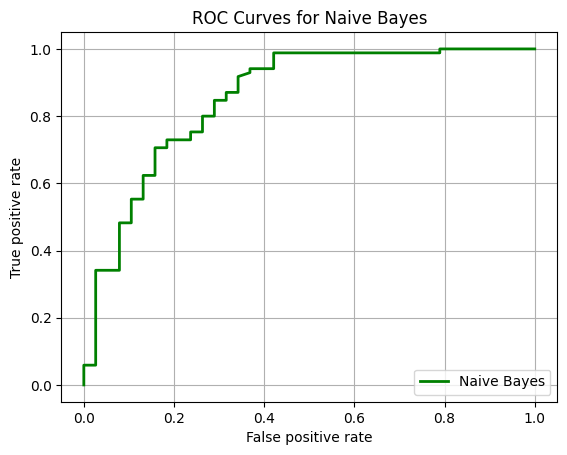

In [ ]:
# Plot for Naive Bayes Classifier
plt.plot(nbc_fpr, nbc_tpr, label="Naive Bayes", color="green", linewidth=2)

# Axis labels
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curves for Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The Naive Bayes model was trained using the selected features: Credit_History, TotalIncome_log,
Property_Area_Ord, Married_Yes, and Education_Not Graduate.
Hyperparameter tuning identified var_smoothing = 1e-12 as the optimal value,
indicating that minimal variance smoothing was required and that the feature distributions were already stable after scaling.

Model performance was evaluated at multiple probability thresholds:
At a 0.3 threshold, the model achieved an overall accuracy of 85%.
It showed very high recall for the positive class (0.99), correctly identifying almost all approved loan cases, with only one false negative. However, this resulted in more false positives (17), meaning some ineligible applicants were predicted as eligible.
At a 0.8 threshold, overall accuracy remained similar at 85%, but the prediction behavior became more conservative. False positives reduced slightly, and precision for the positive class improved marginally.

However, recall decreased to 0.96, indicating that a few more eligible applicants were missed compared to the lower threshold.
Overall, the Naive Bayes model demonstrates stable performance across thresholds, with the lower threshold favoring higher recall (capturing more eligible applicants) and the higher threshold favoring slightly stricter approval decisions.

# Logistic Regression

Logistic Regression is used because it provides a simple yet powerful linear decision boundary and produces interpretable probability estimates. Its coefficients allow examination of how each feature contributes to the predicted likelihood of loan approval.

This model serves as a strong baseline for structured tabular data and enables further analysis through ROC curves and threshold adjustment. Different probability thresholds are explored to understand the trade-off between false approvals and missed approvals.


In [ ]:
# Base model
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Sequential Feature Selector
sfs_logreg = SequentialFeatureSelector(
    logreg,
    n_features_to_select='auto',
    direction='forward',
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

# Pipeline: Scaling -> Feature Selection - Logistic Regression
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', sfs_logreg),
    ('classifier', logreg)
])

# Hyperparameter grid
param_grid_logreg = {
    'classifier__C': [0.1, 1, 10]  # note the double underscore for pipeline
}

# GridSearchCV with pipeline
grid_logreg = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit pipeline on training data
grid_logreg.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", grid_logreg.best_params_)
print("Best Score:", grid_logreg.best_score_)

# Get selected features
selected_features_mask_logreg = grid_logreg.best_estimator_.named_steps['feature_selector'].get_support()
selected_features_logreg = X_train.columns[selected_features_mask_logreg]
print("Selected Features:", selected_features_logreg)

Best Params: {'classifier__C': 0.1}
Best Score: 0.7983714698000413
Selected Features: Index(['LoanAmount', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate'],
      dtype='object')


In [ ]:
# Predict probabilities on test set
logreg_probs = grid_logreg.predict_proba(X_test)[:, 1]

# Evaluate both thresholds
evaluate_threshold(0.3,logreg_probs)
evaluate_threshold(0.5,logreg_probs)
evaluate_threshold(0.8,logreg_probs)


=== Threshold = 0.3 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Threshold = 0.5 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Threshold = 0.8 ===
Confusion Matrix:
[[31  7]
 [33 52]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.82

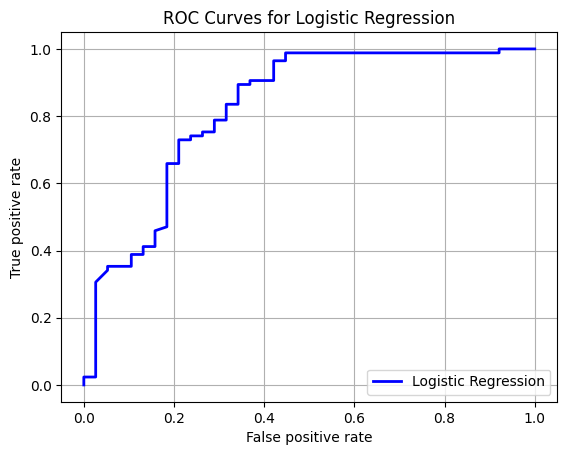

In [ ]:
# Plot for Logistic Regression
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, logreg_probs)
plt.plot(log_fpr, log_tpr, label="Logistic Regression", color="blue", linewidth=2)

# Axis labels
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curves for Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The logistic regression model was trained using the selected features: LoanAmount, Credit_History, Gender_Male, Married_Yes, and Education_Not Graduate. Hyperparameter tuning identified C = 0.1 as the optimal regularization parameter, achieving a best cross-validation accuracy of 79.8%, indicating good generalization performance.

Model performance was evaluated at two probability thresholds:

At a 0.3 threshold, the model achieved an overall accuracy of 85%. It demonstrated very high recall for the positive class (0.99), correctly identifying nearly all approved loan cases, with only one false negative. However, this came at the cost of more false positives (17), meaning some ineligible applicants were predicted as eligible.

At a 0.8 threshold, overall accuracy decreased to 67%. While precision for the positive class improved (0.88), recall dropped significantly to 0.61, resulting in a higher number of false negatives (33). This indicates the model became more conservative, reducing false approvals but failing to identify many actual eligible applicants.

Overall, the model’s performance is sensitive to the classification threshold. A lower threshold (0.3) favors recall and is more suitable when minimizing missed eligible applicants is important, whereas a higher threshold (0.8) favors precision and is preferable when reducing risky approvals is the priority.

# Random Forest Classifier

Random Forest is included as a non-linear ensemble model capable of capturing complex relationships and interactions between features. Unlike linear models, it can represent non-monotonic patterns and is generally robust to noise and feature scaling.

Feature importance scores derived from the Random Forest model also provide insight into which variables most strongly influence predictions.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Smaller RF for feature selection
rf_small = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Smarter feature count
n_feats = int(np.sqrt(X_train.shape[1]))

sfs_rf = SequentialFeatureSelector(
    rf_small,
    n_features_to_select=n_feats,
    direction='forward',
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

pipe_rf = Pipeline([
    ('feature_selector', sfs_rf),
    ('classifier', rf)
])

param_dist_rf = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

search_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('feature_selector',
                                              SequentialFeatureSelector(cv=3,
                                                                        estimator=RandomForestClassifier(class_weight='balanced',
                                                                                                         n_estimators=50,
                                                                                                         n_jobs=-1,
                                                                                                         random_state=42),
                                                                        n_features_to_select=3,
                                                                        n_jobs=-1,
                                                                        scoring='roc_auc')),
                                             ('classifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_jobs=-1,
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 15],
                                        'classifier__min_samples_leaf': [1, 2],
                                        'classifier__min_samples_split': [2, 5],
                                        'classifier__n_estimators': [100, 150,
                                                                     200]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# Predict probabilities on test set using the tuned model
rf_probs = search_rf.predict_proba(X_test)[:, 1]

# Evaluate both thresholds
evaluate_threshold(0.3,rf_probs)
evaluate_threshold(0.5,rf_probs)
evaluate_threshold(0.8,rf_probs)


=== Threshold = 0.3 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


=== Threshold = 0.5 ===
Confusion Matrix:
[[23 15]
 [ 7 78]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68        38
         1.0       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123


=== Threshold = 0.8 ===
Confusion Matrix:
[[38  0]
 [85  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      1.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


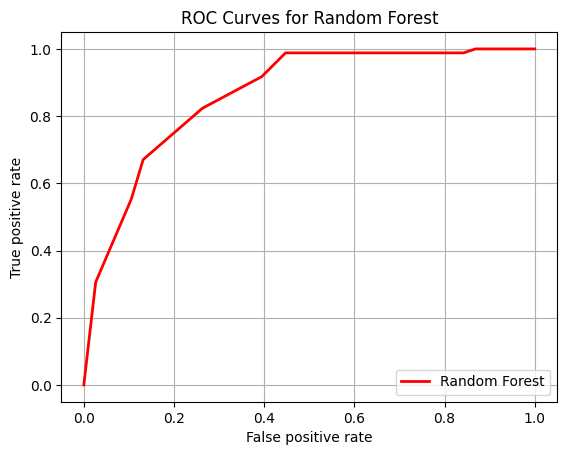

In [ ]:
# ROC Plot for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label="Random Forest", color="red", linewidth=2)

# Axis labels
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curves for Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

For the random forest model, the selected features from the forward feature selection were: Credit_History, Property_Area, Gender, Married, Self_Employed.

For the hyperparameters, the best performing ones were:
max_depth: None,
min_samples_leaf: 2,
min_samples_split: 2,
n_estimators: 100.

The best ROC-AUC on training cross-validation was 74.7% (0.5 threshold).

After that the model was tested on two more thresholds (0.3 and 0.8) apart from the default threshold (0.5). At the 0.3 threshold the accuracy increased to 85%. It showed very high recall for the positive class (0.99), correctly identifying almost all approved loan cases, with only one false negative. However, this resulted in more false positives (17), meaning some ineligible applicants were predicted as eligible.

At a 0.8 threshold, overall accuracy significantly decreased to 37% and the recall also dropped drastically. None of the cases were correctly identified, meaning that the 0.8 threshold is not suitable.

Overall, the random forest classifier showed a good accuracy of 85%, which means that it was correctly identifying wheather or not the loan should be granted 85% of the time.

## Model Comparison and Interpretation

The performance of the models is compared using multiple evaluation metrics, including accuracy, precision, recall, and F1-score. Considering several metrics is important because loan approval decisions involve asymmetric risks, such as incorrectly approving high-risk applicants or rejecting reliable ones.


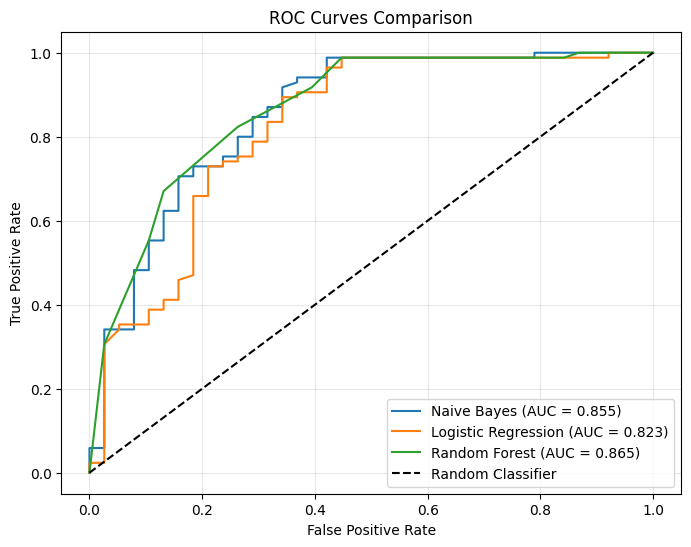

In [ ]:
# Plot
plt.figure(figsize=(8,6))

# Compute AUC scores
auc_nb = roc_auc_score(y_test, nb_probs)
auc_log = roc_auc_score(y_test, logreg_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

plt.plot(nbc_fpr, nbc_tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")

# Diagonal reference line
plt.plot([0,1],[0,1],'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [ ]:
print("<-----Naive Bayes Classification Report----->")
nbc_classification_report = evaluate_threshold(0.5,nb_probs)
print(nbc_classification_report)

print("<-----Logistic Regression Classification Report----->")
logreg_classification_report = evaluate_threshold(0.5,logreg_probs)
print(logreg_classification_report)

print("<-----Random Forest Classification Report----->")
rf_classification_report = evaluate_threshold(0.5,rf_probs)
print(rf_classification_report)

<-----Naive Bayes Classification Report----->

=== Threshold = 0.5 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

None
<-----Logistic Regression Classification Report----->

=== Threshold = 0.5 ===
Confusion Matrix:
[[21 17]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

None
<-----Random Forest Classification Report----->

=== Threshold =

## Interpretation of ROC Curves and Classification Results

All three models perform clearly better than random guessing, as shown by ROC curves well above the diagonal baseline. Random Forest achieves the highest AUC, followed closely by Naive Bayes and Logistic Regression, indicating that all models have similar ability to distinguish between approved and rejected applications.

At the default threshold of 0.5, Naive Bayes and Logistic Regression produce identical results, achieving high recall for approved loans but relatively low recall for rejected applicants. This indicates that both models tend to favour predicting approval, which increases the risk of accepting potentially unreliable applicants.

Random Forest shows slightly lower overall accuracy but a more balanced classification between approved and rejected cases. This suggests that it is somewhat better at identifying risky applicants, even though the improvement is moderate.

Overall, the similarity in performance across models suggests that the dataset contains a few dominant predictive features, allowing even simple models to perform well.


## Conclusions and Future Work

This project demonstrated how supervised machine learning models can be applied to predict loan approval decisions using structured applicant data. The analysis revealed that the predictive structure of the dataset is dominated by a small number of highly informative features, particularly credit history, which explains the similar performance observed across models.

While Logistic Regression and Naive Bayes provide stable and interpretable predictions, Random Forest offers slightly improved discrimination between high-risk and low-risk applicants due to its ability to capture non-linear relationships. However, the modest differences between models suggest that further improvements in predictive accuracy would likely require richer input data rather than increased model complexity.

Future work could focus on incorporating additional financial indicators, exploring cost-sensitive learning to reflect real-world lending risks, and evaluating fairness considerations to ensure that automated decision systems do not introduce unintended bias. Expanding the dataset and integrating temporal or behavioural variables may further enhance model robustness and practical applicability.
